# Steps to remember before sending a job to a machine : 
* Simulate on a perfect simulator (qasm)
* Simulate on a noisy simulator (statevector with noise model for example)
* Execute on the real machine

In [1]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

In [2]:
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

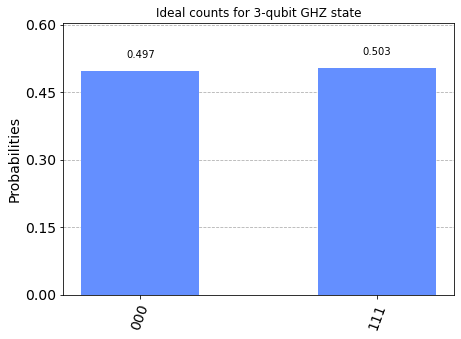

In [3]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [4]:
sim_vigo = AerSimulator.from_backend(device_backend)

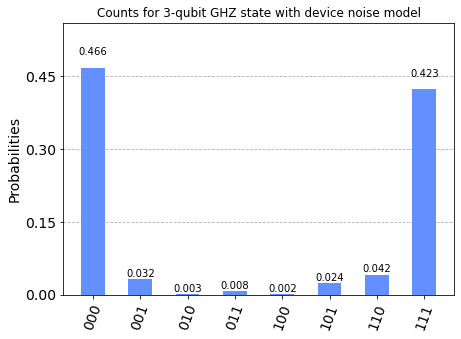

In [5]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

In [23]:
from qiskit import IBMQ

# provider = IBMQ.load_account()
provider = IBMQ.get_provider(project='core-team')

for k,v in provider.backend.__dict__.items():
    print("Clé : ",k," : ",v)


Clé :  _provider  :  <AccountProvider for IBMQ(hub='ibm-q-internal', group='support', project='core-team')>
Clé :  ibmq_armonk  :  ibmq_armonk
Clé :  ibmq_montreal  :  ibmq_montreal
Clé :  ibmq_toronto  :  ibmq_toronto
Clé :  ibmq_bogota  :  ibmq_bogota
Clé :  ibmq_mumbai  :  ibmq_mumbai
Clé :  ibmq_lima  :  ibmq_lima
Clé :  ibmq_belem  :  ibmq_belem
Clé :  ibmq_quito  :  ibmq_quito
Clé :  ibmq_guadalupe  :  ibmq_guadalupe
Clé :  simulator_statevector  :  simulator_statevector
Clé :  simulator_mps  :  simulator_mps
Clé :  simulator_extended_stabilizer  :  simulator_extended_stabilizer
Clé :  simulator_stabilizer  :  simulator_stabilizer
Clé :  ibmq_brooklyn  :  ibmq_brooklyn
Clé :  ibmq_jakarta  :  ibmq_jakarta
Clé :  ibm_hanoi  :  ibm_hanoi
Clé :  ibm_lagos  :  ibm_lagos
Clé :  ibm_cairo  :  ibm_cairo
Clé :  ibm_auckland  :  ibm_auckland
Clé :  ibm_perth  :  ibm_perth
Clé :  ibm_washington  :  ibm_washington
Clé :  simulator_qasm3  :  simulator_qasm3


In [24]:
backend = provider.backend.ibm_washington
# transpiled = transpile(circ,backend)
# job = backend.run(transpiled)
# retrieved = backend.retrieve_job(job.job_id())#Have to wait for the job to exit the queue

In [29]:
status = backend.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs
print("status :",status,"\nis_operational : ",is_operational,"\njobs_in_queue : ",jobs_in_queue,"\njob_limit : ",backend.job_limit().maximum_jobs)
# print(status.__dict__)
# for k,v in backend.__dict__.items():
#     print("Clé : ",k," : ",v)

status : <qiskit.providers.models.backendstatus.BackendStatus object at 0x0000016C3F9A9160> 
is_operational :  True 
jobs_in_queue :  3 
job_limit :  None
